5.872000000000001e-06 0.0003001224942525315


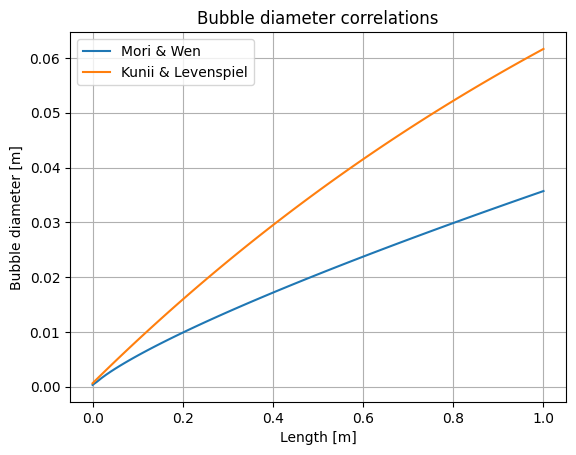

In [37]:
import numpy as np
import matplotlib.pyplot as plt


u0 = 0.05
Lr = 1
nz = 100
u_mf = 0.01


z = np.linspace(0,Lr,nz)


# Perforated plate
Ac = 55e-6 # Check after the right order of magnitude in Trombouze - CHECKED
nd = 100 # Number of perforated holes
db0_perforated = 0.347 * ((Ac * (u0 - u_mf) / nd) ** 0.4)

# Porous plate
db0_porous = (3.67 * 10**(-3)) * (u0 - u_mf)**2

d_b_func_1 = 0.138*(z**0.8)*((u0 - u_mf)**0.42)*np.exp(((u0 - u_mf)**2)*(-0.25/(10**5)) - ((u0 - u_mf)/(10**3)))

print(db0_porous,db0_perforated)

d_b_func_FIRST_OPTION = np.maximum(d_b_func_1, db0_perforated)


db_0 = 0.376*((u0 - u_mf)**2)

A = 0.5 # Area of the perforated plate holes?
D = 0.5 # Also the column diameter but this should be checked
Dt = 0.5 # Column diameter ranging from 0.01 to 1 meters

# d_b = np.maximum(d_b_0, d_b_func)
d_b_max = np.minimum(0.65*((A*(u0 - u_mf))**0.4),D)
d_b_func_SECOND_OPTION = d_b_max - (d_b_max - db_0)*(np.exp(-(0.3*z)/D))

d_b_func_THIRD_OPTION = 0.853*((1 + (0.272*(u0 - u_mf)))**(1/3))*((1 + 0.0684*z)**(1.21))



g = 9.81
u_br = 0.711*(np.sqrt(g*d_b_func_FIRST_OPTION))

# Valid only for column diameters of less than 1 meter
u_b_type_A = 1.55*((Dt)**(0.32))*((u0 - u_mf) + 14.1*(d_b_func_FIRST_OPTION + 0.005))+ u_br
u_b_type_B = 1.6*((Dt)**(1.35))*((u0 - u_mf) + 1.13*(d_b_func_FIRST_OPTION**(0.5))) + u_br

plt.plot(z,d_b_func_FIRST_OPTION, label = 'Mori & Wen')
plt.plot(z,d_b_func_SECOND_OPTION, label = 'Kunii & Levenspiel')
# plt.plot(z,d_b_func_THIRD_OPTION, label = 'Werther - Specific for B Type')
plt.title('Bubble diameter correlations')
plt.xlabel('Length [m]')
plt.ylabel('Bubble diameter [m]')
plt.grid()
plt.legend()

(0.0, 1.2)

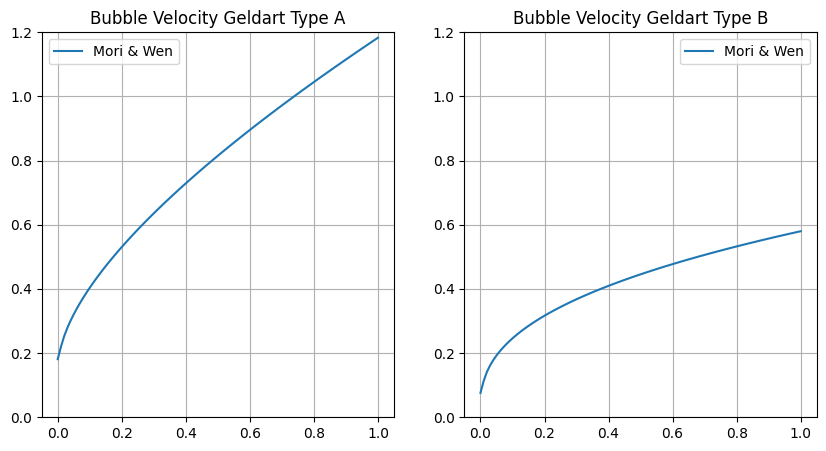

In [36]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(z,u_b_type_A, label = 'Mori & Wen')
ax[0].grid()
ax[0].set_title('Bubble Velocity Geldart Type A')
ax[0].legend()
ax[0].set_ylim(0,1.2)


ax[1].plot(z,u_b_type_B, label = 'Mori & Wen')
ax[1].grid()
ax[1].set_title('Bubble Velocity Geldart Type B')
ax[1].legend()
ax[1].set_ylim(0,1.2)